In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [14]:
data = pd.read_csv('./data/cleaned.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
kategorie = ['vodka', 'rum', 'fernet', 'whisky', 'becherovka', 'koktejly', 'koktejly recepty', 'pivo', 'víno', 'pivo chladicí zařízení', 'pivo výčep', 'sekt', 'šampaňské', 'slivovice', 'koňak', 'vaječňák', 'metaxa', 'alkoholismus', 'alkoholik', 'alkohol']

In [15]:
data.date = pd.to_datetime(data.date, errors='coerce')

In [17]:
data.pocet = pd.to_numeric(data.pocet, errors='coerce')

In [33]:
def categorizer(string):
    for kat in kategorie:
        if (kat in str(string)):
            return kat

In [34]:
data['kategorie'] = data.vyraz.apply(lambda x: categorizer(x))

In [39]:
skupiny = pd.DataFrame(data.groupby(['kategorie', 'date']).pocet.sum())
skupiny.reset_index(inplace=True)

In [52]:
outDict = {}
for row in skupiny.iterrows():
    kat = row[1]['kategorie']
    date = row[1]['date']
    pocet = row[1]['pocet']
    
    if kat not in outDict:
        outDict[kat] = {}
    outDict[kat][date] = pocet

In [53]:
katFrame = pd.DataFrame.from_dict(outDict, orient='index')

In [58]:
katFrame.sort_index(axis=1, inplace=True)

In [59]:
katFrame.to_excel('./data/kategorie.xlsx')

In [5]:
data[data.date == '2014-12-01'].sort_values(by='pocet', ascending=False).head(10)

vyraz   pocet       date
2098224                  vaječný koňak recept  100137 2014-12-01
2115189       tn.cz láďa hruška vaječný koňak   17043 2014-12-01
2176280                       domácí vaječňák   15997 2014-12-01
2155081                          alkohol test   13279 2014-12-01
2157108  vaječný koňak z kondenzovaného mléka    7203 2014-12-01
2121966           domácí vaječný koňak recept    6793 2014-12-01
2158080                         alkoholtester    6644 2014-12-01
2104873                  recepty svařené víno    6530 2014-12-01
2118172                         vaječný koňak    6399 2014-12-01
2175439                         vaječný konak    5307 2014-12-01

In [27]:
data[data.date == '2015-05-01'].sort_values(by='pocet', ascending=False).head(20)

vyraz  pocet       date
2639978                alkohol test  13777 2015-05-01
2606697           pampeliškové víno   6462 2015-05-01
2629395  alkohol kalkulačka on-line   4466 2015-05-01
2622454         proteinové koktejly   2295 2015-05-01
2650523         koktejly na hubnutí   2068 2015-05-01
2639397              alkohol tester   1912 2015-05-01
2650417                   pivo akce   1762 2015-05-01
2565172                  zacapa rum   1656 2015-05-01
2630187            chlazení na pivo   1504 2015-05-01
2614431                     alkohol   1463 2015-05-01
2648468               alkoholtester   1446 2015-05-01
2634465          kalkulačka alkohol   1437 2015-05-01
2573847              alkohol v krvi   1393 2015-05-01
2635275                búrlivé víno   1387 2015-05-01
2635977        vaječný koňak recept   1380 2015-05-01
2564553                 pivo v akci   1342 2015-05-01
2573533                alkoholismus   1341 2015-05-01
2561720      bezinkové víno z květů   1339 2015-05-01
2566479                      whisky   1291 2015-05-01
2631879                  becherovka   1173 2015-05-01

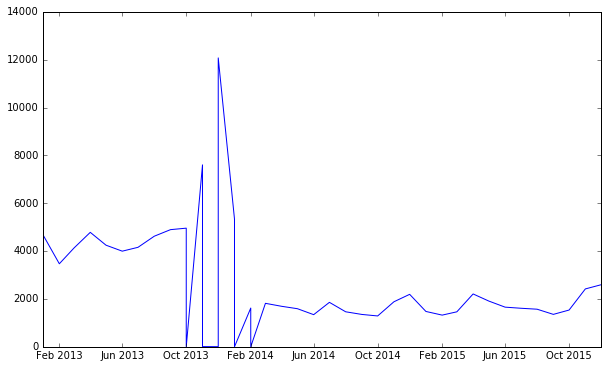

In [6]:
sub = data[data.vyraz == 'alkohol tester']

nums = []
idxs = []

for row in sub.iterrows():
    nums.append(row[1]['pocet'])
    idxs.append(row[1]['date'])
    
plt.plot(idxs, nums)    